most code is adopted from here:
https://mark-kramer.github.io/Case-Studies-Python/09.html

additional code is from:
https://towardsdatascience.com/generalized-linear-models-9cbf848bb8ab
https://github.com/kidaufo/StatisticalModeling/blob/master/GLM.ipynb


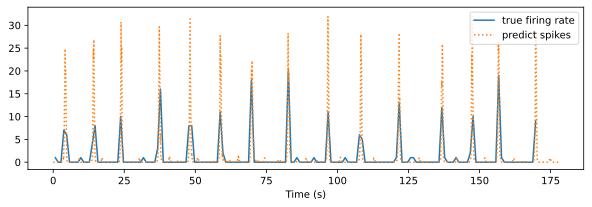

In [6]:
## stats model testing with GLM
# Import modules ...
from scipy.io import loadmat                     # To load .mat files
import statsmodels.api as sm                     # To fit GLMs
from statsmodels.genmod.families import Poisson  # ... Poisson GLMs
from pandas import DataFrame as df               # Table object for working with data
from pylab import *                              # Numerical and plotting functions
import pynapple as nap
from scipy import signal, stats

import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
rcParams['figure.figsize']=(10,3)                # Change the default figure size

## load mat file

data = loadmat('/Users/hunglo/Downloads/spikes-1.mat')     # Load the data,
t = data['t'][:, 0]                                        # Extract the t variable,
X = data['X'][:, 0]                                        # Extract the X variable,
spiketimes = data['spiketimes']                            # ... and the spike times.
spiketrain = histogram(spiketimes, 
                         bins = len(t), 
                         range = (t[0], t[-1]))[0] 
spikeindex = where(spiketrain!=0)[0]                       # Get the spike indices.

## generate sides info
right_side = signal.find_peaks(X,height=80,distance=5000)[0]
left_side = signal.find_peaks(-X,height=-20,distance=5000)[0]
sides = np.ones_like(X).astype(int)
for left,right in zip(left_side[:-1],right_side):
    sides[left:right] = 0 # mark all left to right path to 0
## generate velocity
velocity = pd.Series(X).diff()/pd.Series(t).diff()[1]
velocity[0] = 0 # replace NaN at the beginning

acceleration = pd.Series(X).diff()/pd.Series(t).diff()[1]**2
acceleration[0] = 0 # replace NaN at the beginning

## number of bins
num_bins = 20
bin_size = 100/num_bins

# bin_edges = arange(-5, 106, 100/num_bins)                            # Define spatial bins.
bin_edges = arange(-bin_size/2, 100+bin_size/2+1, bin_size)
spikehist = histogram(X[spikeindex], bin_edges)[0]         # Histogram positions @ spikes.
occupancy = histogram(X, bin_edges)[0]*0.001               # Convert occupancy to seconds.
predictors = df(data={                                     # Create a dataframe of predictors
  'Intercept': ones_like(X),
  'X': X,
  'X2': X**2,
  'X3':X**3,
  'sides':sides,
  'velocity':velocity,
  'acceleration':acceleration
  })

# GLM model with Poisson family and identity link function
model3 = sm.GLM(spiketrain, predictors, family=Poisson())  # Create the model
model3_results = model3.fit()                              # Fit model to our data
b3 = model3_results.params                                 # Get the predicted coefficient vector

# bins = linspace(0, 100, num_bins+1)
# bar(bins, spikehist / occupancy, width=8)                  # Plot results as bars.
# plot(bins,                                                 # Plot model.
#      exp(b3[0] + b3[1] * bins + b3[2] * bins**2 ) * 1000,
#      'k', label='Model')
# xlabel('Position [cm]')                                    # Label the axes.
# ylabel('Occupancy norm. hist. [spikes/s]')
# legend()
# show()

y_pred = model3_results.predict(predictors)
# plt.plot(t,X)
nap.Ts(t[spikeindex]).count(1).plot(label='true firing rate',c='C0')
# plt.plot(t,spiketrain)
plt.plot(t,y_pred*1000,label='predict spikes',ls=':',c='C1') # y_hat
# plt.plot(t[spikeindex],X[spikeindex],marker='x',ls='',c='C3',label='spike')
plt.legend(loc=1)
## now it's single sided

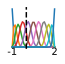

In [7]:
## set up spline
from patsy import dmatrices, dmatrix

FS=10
'''
11-degrees-of-freedom regression spline basis set with a 2-s duration
'''
fr=FS
spline_w=3
x = np.linspace(0., 3., spline_w*fr)
datax={'x': x}
nsplines=11
splines = dmatrix('bs(x, df=%s, degree=3, include_intercept=True) - 1'%nsplines,{'x': x})
plt.figure(figsize=(1,1))
plt.plot(x-1, splines)
plt.axis('off')
plt.axvline(x=0,linestyle='--',color='k')
plt.text(-1,-0.01,'-1',horizontalalignment='center',verticalalignment='top')
plt.text(2,-0.01,'2',horizontalalignment='center',verticalalignment='top')
plt.tight_layout()
plt.show()

def make_splines(nsplines=17,spline_w=3,fr=FS):
    x = np.linspace(0., spline_w, spline_w*fr)
    splines = dmatrix('bs(x, df=%s, degree=3, include_intercept=True) - 1'%nsplines,{'x': x})
    return (splines)

# plt.plot(np.array(make_splines(nsplines=7,spline_w=3,fr=FS)))



In [371]:
tsd2conv(P1_tsd,'P1',nsplines,spline_w,FS,pre,post)

,P1_splines0,P1_splines1,P1_splines2,P1_splines3,P1_splines4,P1_splines5,P1_splines6,P1_splines7,P1_splines8,P1_splines9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,P1_splines0,P1_splines1,P1_splines2,P1_splines3,P1_splines4,P1_splines5,P1_splines6,P1_splines7,P1_splines8,P1_splines9
0,0.0,0.196632,0.595433,0.207859,0.000076,0.000000,0.000000,0.000000,0.00000,0.000000
1,0.0,0.102787,0.575087,0.319316,0.002810,0.000000,0.000000,0.000000,0.00000,0.000000
2,0.0,0.044876,0.503113,0.438207,0.013804,0.000000,0.000000,0.000000,0.00000,0.000000
3,0.0,0.014224,0.399750,0.547186,0.038841,0.000000,0.000000,0.000000,0.00000,0.000000
4,0.0,0.002158,0.285235,0.628905,0.083703,0.000000,0.000000,0.000000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.000000,0.000000,0.000000,0.110431,0.651284,0.238898,0.043374,0.40361,0.552403
96,0.0,0.000000,0.000000,0.000000,0.055303,0.586557,0.353285,0.004855,0.00000,1.000000
97,0.0,0.000000,0.000000,0.000000,0.022477,0.487137,0.471114,0.019272,0.00000,0.000000
98,0.0,0.000000,0.000000,0.000000,0.006173,0.370370,0.574074,0.049383,0.00000,0.000000


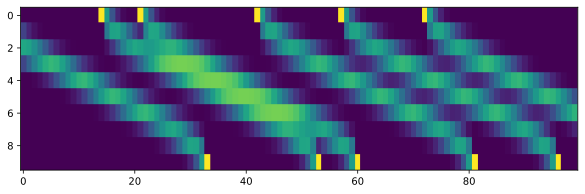

In [491]:
## make a for loop for convolution

## make timestamps to time series data (binning)
def make_tsd(P1,df_z,limit_range_1,limit_range_2):
    t_ = df_z.index
    P1_tsd = np.histogram(P1, bins = len(df_z.index),range = (df_z.index[0], df_z.index[-1]))[0][limit_range_1:limit_range_2] # limiting to just the part we are interesting
    return P1_tsd, t_

def make_splines(nsplines=10,spline_w=3,fr=FS):
    x = np.linspace(0., spline_w, spline_w*fr)
    splines = dmatrix('bs(x, df=%s, degree=3, include_intercept=True) - 1'%nsplines,{'x': x})
    return (splines)

def tsd2conv(P1_tsd, col_name ,nsplines=10,spline_w=3,FS=10,pre=1,post=2):
    splines = make_splines(nsplines=nsplines,spline_w=spline_w,fr=FS)
    P1_splines = np.empty((len(splines.T),len(P1_tsd)))
    for i in range(len(splines.T)):
        P1_splines[i,:] = np.convolve(P1_tsd,splines.T[i],'full')[int(FS*pre):-int(FS*post)+1]

    df = pd.DataFrame(P1_splines.T,columns=[f'{col_name}_splines{i}' for i in range(len(splines.T))])
    return df

FS=10
nsplines = 10
# pre,post = 1,2
spline_w=4
pre, post = 2,2
df = tsd2conv(P1_tsd,'P1',nsplines,spline_w,FS,pre,post)
imshow(df.T,aspect='auto')
df

# for i in range(len(splines.T)):
#     plot(pd.DataFrame(P1_splines.T,columns=[f'P1_splines{i}' for i in range(len(splines.T))]).iloc[:,i]+i)

## ok this is good, now functionalized this
## and loop it for all behaviors we have

## next will be functionalized the model fitting part.

## also functionalize the make spline part, can just adapt from Ilana's paper


In [492]:
P1_tsd

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

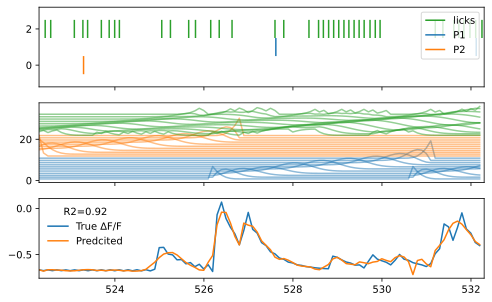

done for all models


In [551]:
## load aPC data for example
## aPC example

## aPC control
file_path = '/Users/hunglo/Documents/inscopix_csv/processed_npy/BES0224_20.08.18_CaMK2_strawberry_water_mild.npy' # check with any other npy files we have
file_path = '/Users/hunglo/Documents/inscopix_csv/processed_npy/BES0224_20.08.20_CaMK2_strawberry_water_mild.npy' # check with any other npy files we have

# OFC
# file_path = '/Users/hunglo/Documents/inscopix_csv/processed_npy/DSC019850_23.07.26_OFC_strawberry_water_severe.npy'
# file_path = '/Users/hunglo/Documents/inscopix_csv/processed_npy/DSC019848_23.08.01_OFC_chocolate_water_none.npy'

## GC
# file_path = '/Users/hunglo/Documents/inscopix_csv/processed_npy/DSC018623_23.01.03_GC_strawberry_water_none.npy' 
# file_path = '/Users/hunglo/Documents/inscopix_csv/processed_npy/DSC018624_23.01.03_GC_strawberry_water_none.npy'


dat = np.load(file_path, allow_pickle=True)
binge_epoch = dat.item()['Binge_epoch']               
df_z = dat.item().get('neuron_data_z')
df_z = df_z[0:] # remove first few seconds, there seems to be intial artifacts
licks = dat.item().get('licks')
P1 = dat.item().get('P1')
P2 = dat.item().get('P2')

## check if inputs are all presented
if licks is None or P1 is None or P2 is None or df_z is None or binge_epoch is None:
    print('something missing')

## make sure frame rate is checked
FS = int(1/round(df_z.index[1]-df_z.index[0],2)) # should be 10 Hz anyway

## limits to just a few frames (first 10 sec of first event?)
pre,post = 1,9 # sec, before and after a given reference time point (usually based on pump events)
nsplines = 11 # numbers of splines used for convolution
splines_w = 5 # 3 sec window for spline width (-1 to +2s)
splines_pre = 1.5 # sec for the spline windows
splines_post = splines_w-splines_pre # sec for the spline windows

### set up timing for fitting
## for slow eating
time_ref = P2[1] # for aPC
time_ref = P2[3]
# for OFC
# time_ref = P1[3]
# time_ref = P1[2] # for GC
## for binge eating
# time_ref = binge_epoch['start'][0]

## in case you want to sort the data with Ca2+ responses
diff_ = df_z[binge_epoch['start'][0]:binge_epoch['start'][0]+10].mean() - df_z[binge_epoch['start'][0]-10:binge_epoch['start'][0]].mean() # sorted by post-pre 10 sec binge onset
isort = np.argsort(-diff_)
sorted_cell_name = df_z.columns[isort]

R2_list,R2_list_nolick,R2_list_noP1,R2_list_noP2,R2_list_noConstant = [],[],[],[],[]

for i_, neuron_idx in enumerate(sorted_cell_name[:]):
# for i_, neuron_idx in enumerate([' C037',]):
    dff = df_z[neuron_idx].values 
    limit_range_1 = int(time_ref*FS-FS*pre)
    limit_range_2 = int(time_ref*FS+FS*post)

    dff = dff[limit_range_1:limit_range_2]
    # plot(dff)
    if list(dff).count(dff[0]) == len(dff): # check if the neuron data is flat line
        print(f'No Ca2+ transient in this neuron {neuron_idx} (flat line)')
        continue

    ## predictors: P1, P2, licks
    ## make all timestamps to timeseries first
    P1_tsd, t_ = make_tsd(P1,df_z,limit_range_1,limit_range_2)
    P2_tsd, t_ = make_tsd(P2,df_z,limit_range_1,limit_range_2)
    licks_tsd, t_ = make_tsd(licks,df_z,limit_range_1,limit_range_2)
 # P1_tsd, col_name ,nsplines=10,spline_w=3,FS=10,pre=1,post=2):
    predictors = pd.concat([tsd2conv(P1_tsd,'P1',nsplines,splines_w,FS,splines_pre, splines_post),tsd2conv(P2_tsd,'P2',nsplines,splines_w,FS,splines_pre, splines_post),tsd2conv(licks_tsd,'licks',nsplines,splines_w,FS,splines_pre, splines_post)],axis=1)
    predictors = stats.zscore(predictors,axis=0).fillna(0)
    predictors = sm.add_constant(predictors) # adding 1s
    
    model = sm.GLM(dff, predictors, family=sm.families.Gaussian())
    model_results = model.fit_regularized(method='elastic_net',L1_wt=0)   # Fit model to our data with L2 Ridge penality 
    y_pred = model_results.predict(predictors)
    R2_list.append(stats.pearsonr(dff,y_pred)[0]**2)
    if i_==0:
        b = model_results.params
        fig, axes = plt.subplots(nrows=3,sharex=True,figsize=[8,5])
        axes[2].plot(arange(time_ref-pre,time_ref+post,step=1/FS),dff,label='True ∆F/F')
        axes[2].plot(arange(time_ref-pre,time_ref+post,step=1/FS),y_pred,label='Predcited')
        axes[2].legend(frameon=False,title=f'R2={R2_list[-1]:.2g}')
        axes[0].eventplot([licks,P1,P2],lineoffsets=[2,1,0],colors=['C2','C0','C1'])
        axes[0].legend(['licks','P1','P2'])
        for i in range(predictors.shape[1]):
            if i >0:
                axes[1].plot(arange(time_ref-pre,time_ref+post,step=1/FS) ,predictors.iloc[:,i]+i,c=f'C{int(abs(np.floor((i-1)//nsplines)))}',alpha=0.5)
        axes[0].set_xlim([time_ref-pre,time_ref+post])
        show()

    ## same but remove P1
    predictors_ = predictors[predictors.columns.drop(list(predictors.filter(regex='P1')))]
    # df[df.columns.drop(list(df.filter(regex='Test')))]
    model = sm.GLM(dff, predictors_, family=sm.families.Gaussian())
    model_results = model.fit_regularized(method='elastic_net',L1_wt=0)   # Fit model to our data with L2 Ridge penality 
    y_pred = model_results.predict(predictors_)
    R2_list_noP1.append(stats.pearsonr(dff,y_pred)[0]**2)

    ## same but remove P2
    predictors_ = predictors[predictors.columns.drop(list(predictors.filter(regex='P2')))]
    # df[df.columns.drop(list(df.filter(regex='Test')))]
    model = sm.GLM(dff, predictors_, family=sm.families.Gaussian())
    model_results = model.fit_regularized(method='elastic_net',L1_wt=0)   # Fit model to our data with L2 Ridge penality 
    y_pred = model_results.predict(predictors_)
    R2_list_noP2.append(stats.pearsonr(dff,y_pred)[0]**2)

    ## same but remove licks
    predictors_ = predictors[predictors.columns.drop(list(predictors.filter(regex='licks')))]
    # df[df.columns.drop(list(df.filter(regex='Test')))]
    model = sm.GLM(dff, predictors_, family=sm.families.Gaussian())
    model_results = model.fit_regularized(method='elastic_net',L1_wt=0)   # Fit model to our data with L2 Ridge penality 
    y_pred = model_results.predict(predictors_)
    R2_list_nolick.append(stats.pearsonr(dff,y_pred)[0]**2)

    ## same but remove licks
    predictors_ = predictors[predictors.columns.drop(list(predictors.filter(regex='constant')))]
    # df[df.columns.drop(list(df.filter(regex='Test')))]
    model = sm.GLM(dff, predictors_, family=sm.families.Gaussian())
    model_results = model.fit_regularized(method='elastic_net',L1_wt=0)   # Fit model to our data with L2 Ridge penality 
    y_pred = model_results.predict(predictors_)
    R2_list_noConstant.append(stats.pearsonr(dff,y_pred)[0]**2)

print('done for all models')


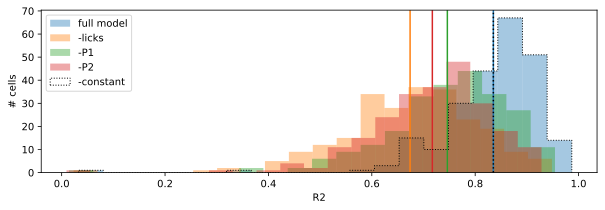

In [552]:

hist(R2_list,bins=20,label='full model',alpha=0.4)
axvline(x=np.mean(R2_list),color='C0')
ylabel('# cells')
xlabel('R2')

hist(R2_list_nolick,bins=20,label='-licks',alpha=0.4)
axvline(x=np.mean(R2_list_nolick),color='C1')

hist(R2_list_noP1,bins=20,label='-P1',alpha=0.4)
axvline(x=np.mean(R2_list_noP1),color='C2')

hist(R2_list_noP2,bins=20,label='-P2',alpha=0.4)
axvline(x=np.mean(R2_list_noP2),color='C3')

hist(R2_list_noConstant,bins=20,label='-constant',histtype='step',color='k',ls=':')
axvline(x=np.mean(R2_list_noConstant),color='k',ls=':')
legend()
show()


In [553]:
R2_df

,index,Full model,-Licking,-Ensure,-Water
0,0,0.734508,0.254393,0.633110,0.734508
1,1,0.858038,0.693042,0.694399,0.858038
2,2,0.602996,0.429986,0.339745,0.602996
3,3,0.837351,0.591650,0.476834,0.837351
4,4,0.727709,0.433785,0.577876,0.727709
...,...,...,...,...,...
232,232,0.909850,0.398973,0.587263,0.909850
233,233,0.939441,0.792874,0.645743,0.939441
234,234,0.793530,0.621544,0.496811,0.793530
235,235,0.882156,0.742457,0.697300,0.882156


group1,group2,meandiff,p-adj,lower,upper,reject
-Ensure,-Licking,-0.0721,0.0,-0.0995,-0.0447,True
-Ensure,-Water,-0.029,0.0331,-0.0565,-0.0016,True
-Ensure,Full model,0.089,-0.0,0.0616,0.1164,True
-Licking,-Water,0.043,0.0003,0.0156,0.0705,True
-Licking,Full model,0.1611,-0.0,0.1337,0.1885,True
-Water,Full model,0.118,-0.0,0.0906,0.1455,True


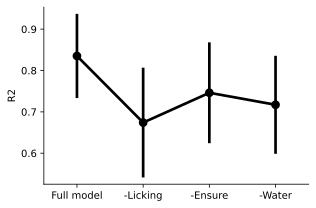

In [554]:
R2_df = pd.DataFrame(data={
    'Full model'     :array(R2_list),
    '-Licking' :array(R2_list_nolick),
    '-Ensure'  :array(R2_list_noP1),
    '-Water'   :array(R2_list_noP2),
    # '-Constant':array(R2_list_noConstant)
}
)
figure(figsize=[4.5,3])
sns.pointplot(R2_df,estimator='mean',errorbar=("sd"),color='k')
ylabel('R2')
# ylim([0,1])
sns.despine()
tight_layout()

from scipy.stats import friedmanchisquare
friedmanchisquare(R2_df.iloc[:,0],R2_df.iloc[:,1],R2_df.iloc[:,2],R2_df.iloc[:,3])
from scipy.stats import f_oneway
f_oneway(R2_df.iloc[:,0],R2_df.iloc[:,1],R2_df.iloc[:,2],R2_df.iloc[:,3])

R2_df = R2_df.reset_index()
R2_long = R2_df.melt(var_name='model',id_vars='index',value_name='R2')

from statsmodels.stats.anova import AnovaRM
aovrm = AnovaRM(R2_long,'R2','index',within=['model'])
model_fit = aovrm.fit()
model_fit.summary()

from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=R2_long['R2'],
                          groups=R2_long['model'],
                          alpha=0.05)
tukey.summary()

[Text(0, 0, 'constant'),
 Text(5, 0, 'P1'),
 Text(16, 0, 'P2'),
 Text(27, 0, 'Licks')]

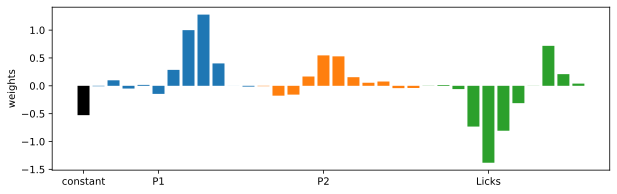

In [555]:
bar(arange(len(b)),b,color=[f"C{((i-1)//nsplines)}" if i!=0 else "k" for i in range(len(b))])
ylabel('weights')
ax = plt.gca()
ax.set_xticks([0,int(nsplines/2),int(nsplines/2)+nsplines,int(nsplines/2)+nsplines*2])
ax.set_xticklabels(['constant','P1','P2','Licks'])



Text(0, 0.5, '∆R2')

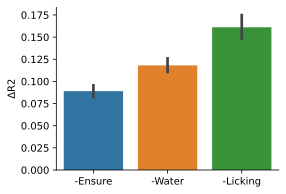

In [557]:
delta_R2_df = pd.DataFrame(data={
    # '-Constant': array(R2_list)-array(R2_list_noConstant),
    '-Ensure'  :array(R2_list)-array(R2_list_noP1),
    '-Water'   :array(R2_list)-array(R2_list_noP2),
    '-Licking'    :array(R2_list)-array(R2_list_nolick),
})
figure(figsize=[4,3])
sns.barplot(delta_R2_df)
sns.despine()
ylabel('∆R2')

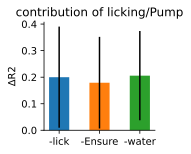

In [40]:
# hist(array(R2_list_nolick) - array(R2_list),bins=20)
# show()


figure(figsize=[2,2])

mean_lick = -mean(array(R2_list_nolick) - array(R2_list))
mean_P1 = -mean(array(R2_list_noP1) - array(R2_list))
mean_P2 = -mean(array(R2_list_noP2) - array(R2_list))

sd_lick = stats.sem(array(R2_list_nolick) - array(R2_list))
sd_P1 = stats.sem(array(R2_list_noP1) - array(R2_list))
sd_P2 = stats.sem(array(R2_list_noP2) - array(R2_list))

sd_lick = std(array(R2_list_nolick) - array(R2_list))
sd_P1 = std(array(R2_list_noP1) - array(R2_list))
sd_P2 = std(array(R2_list_noP2) - array(R2_list))

bar(0,height=mean_lick,width=0.5)
bar(1,height=mean_P1,width=0.5)
bar(2,height=mean_P2,width=0.5)


plot([0,0],[mean_lick-sd_lick,mean_lick+sd_lick],c='k')
plot([1,1],[mean_P1-sd_P1,mean_P1+sd_P1],c='k')
plot([2,2],[mean_P2-sd_P2,mean_P2+sd_P2],c='k')

# xlim([-0.5,2.5])
# ylim([-0.5,0.5])
# axhline(y=0,ls=':',c='k')
ylabel('∆R2')
ax = plt.gca()
ax.set_xticks([0,1,2])
ax.set_xticklabels(['-lick','-Ensure','-water'])
title('contribution of licking/Pump')
sns.despine()


Float64Index([1.0149999999999917, 1.1149999999999913, 1.2149999999999928,
              1.3149999999999924,  1.414999999999992, 1.5149999999999917,
              1.6149999999999913, 1.7149999999999928, 1.8149999999999924,
               1.914999999999992, 2.0149999999999917, 2.1149999999999913,
              2.2149999999999928, 2.3149999999999924,  2.414999999999992,
              2.5149999999999917, 2.6149999999999913, 2.7149999999999928,
              2.8149999999999924,  2.914999999999992, 3.0149999999999917,
              3.1149999999999913, 3.2149999999999928, 3.3149999999999924,
               3.414999999999992, 3.5149999999999917, 3.6149999999999913,
              3.7149999999999928, 3.8149999999999924,  3.914999999999992,
               4.014999999999992,  4.114999999999991,  4.214999999999993,
               4.314999999999992,  4.414999999999992,  4.514999999999992,
               4.614999999999991,  4.714999999999993,  4.814999999999992,
               4.914999999999992, 5.01

In [287]:
dff

array([-0.66579954, -0.67449704, -0.66587666, -0.67466424, -0.66589249,
       -0.67481415, -0.66586136, -0.67495891, -0.66579237, -0.67510706,
       -0.66569105, -0.67526484, -0.66556059, -0.67543689, -0.66540268,
       -0.67562656, -0.66521849, -0.67583556, -0.66501001, -0.67606276,
       -0.6647824 , -0.67630181, -0.66454502, -0.67655159, -0.6642398 ,
       -0.67728155, -0.6587594 , -0.4251145 , -0.42214336, -0.49478679,
       -0.50349596, -0.5572801 , -0.55446125, -0.60070748, -0.58669732,
       -0.63169267, -0.60533884, -0.65660531, -0.61063305, -0.68378861,
       -0.06931806,  0.06806758, -0.10905   , -0.2047002 , -0.27603205,
       -0.39411998, -0.23961566, -0.04373165, -0.2272243 , -0.26743711,
       -0.37110521, -0.40344257, -0.47071395, -0.49261174, -0.53760239,
       -0.55183085, -0.58213212, -0.59139312, -0.61160545, -0.61796964,
       -0.63097209, -0.63596607, -0.64354407, -0.64828341, -0.65177731,
       -0.65403386, -0.51732044, -0.53056921, -0.5579695 , -0.58

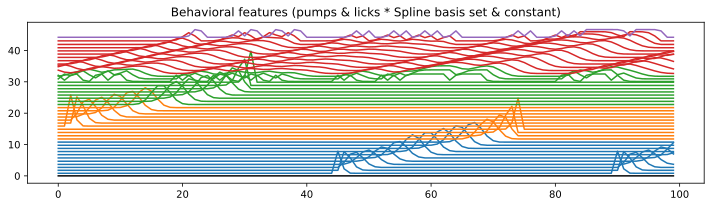

In [284]:
for i in range(predictors.shape[1]):
    if i >0:
        plot(predictors.iloc[:,i]+i,c=f'C{int(abs(np.floor((i-1)//11)))}')
    else:
        plot(predictors.iloc[:,i]-1,c='k')

title(f'Behavioral features (pumps & licks * Spline basis set & constant)')
tight_layout()

In [ ]:
'P1' in list(dat.item().keys())

In [ ]:
hist(R2_list,bins=20)
xlim([0,1])
axvline(x=np.median(R2_list),color='k')

In [ ]:
### compute kernel weights

titles=['fightback start','fightback end',
 'runaway start','runaway end',
 'attack start','attack end',
 'sniffing start','sniffing end']
kernels1={}
models1={}
xs1={}
ys1={}
for m in r2s:
    print(m)
    xs,ys=create_feats_full_session(m,nsplines=nsplines)
    if len(xs)==0:
        continue
    x=sm.add_constant(np.row_stack(xs))
    y=np.concatenate(ys)
    regr,_=regress(x,y)
    models1[m]=regr
    kernels1[m]={}
    xs1[m]=x
    ys1[m]=ys
    for i in range(len(titles)):
        kern=np.sum(splines*regr.params[i*len(splines.T)+1:(i+1)*len(splines.T)+1],axis=1)
        kernels1[m][titles[i]]=kern

In [ ]:
kernel_weights = []
for i in range(3): # 3 variables
    # print(i)
    kern = splines@model_results.params[i*len(splines.T)+1:(i+1)*len(splines.T)+1]
    kernel_weights.append(kern)
t = arange(-1,2,0.05)
figure(figsize=[4,3])
plot(t,kernel_weights[0],label='Ensure',c='C0')
plot(t,kernel_weights[1],label='water',c='C1')
plot(t,kernel_weights[2],label='licks',c='C3')
legend(frameon=False)
title('kernel weights binge onset')
title('kernel weights slow')
tight_layout()
sns.despine()

In [ ]:
from patsy import dmatrices, dmatrix

FS=20
'''
11-degrees-of-freedom regression spline basis set with a 2-s duration
'''
fr=FS
spline_w=3
x = np.linspace(0., 3., spline_w*fr)
datax={'x': x}
nsplines=7
splines = dmatrix('bs(x, df=%s, degree=3, include_intercept=True) - 1'%nsplines,{'x': x})
plt.figure(figsize=(1,1))
plt.plot(x-1, splines)
plt.axis('off')
plt.axvline(x=0,linestyle='--',color='k')
plt.text(-1,-0.01,'-1',horizontalalignment='center',verticalalignment='top')
plt.text(2,-0.01,'2',horizontalalignment='center',verticalalignment='top')
plt.tight_layout()
plt.show()

def make_splines(nsplines=17,spline_w=3,fr=FS):
    x = np.linspace(0., spline_w, spline_w*fr)
    splines = dmatrix('bs(x, df=%s, degree=3, include_intercept=True) - 1'%nsplines,{'x': x})
    return (splines)

plt.plot(np.array(make_splines(nsplines=7,spline_w=3,fr=FS)))



In [ ]:
# start_array[:,i]

start_array=np.zeros((len(P1),len(splines.T)))
P1_convolve = np.zeros((len(P1),len(splines.T)))
for i in range(len(splines.T)):
    # start_array[:,i]=np.convolve(start_array[:,i],splines.T[i],'full')[FS-1:-FS*2]
    plt.plot(np.linspace(-1,3,239),np.convolve(P1,splines.T[i],'full'))
    P1_convolve[:,i] = np.convolve(P1,splines.T[i],'full')[FS-1:-FS*2]


In [ ]:
P1_convolve